In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from __future__ import print_function

import math
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from IPython import display
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd


import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
train_data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
test_data  = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv", sep=",")

In [4]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [0]:
def pre_process_train_data(dataframe):
  features = dataframe.iloc[:,:-1]
  processed_features = features.copy()
  processed_features["rooms_per_person"] =  processed_features["total_rooms"] / processed_features["population"] 
  
  labels = pd.DataFrame()
  labels["median_house_value"] = dataframe.iloc[:,-1] / 1000.0
  return train_test_split(processed_features, labels, test_size = 0.3,shuffle=True)

def pre_process_test_data(dataframe):
  features = dataframe.iloc[:,:-1]
  processed_features = features.copy()
  processed_features["rooms_per_person"] =  processed_features["total_rooms"] / processed_features["population"] 
  
  labels = pd.DataFrame()
  labels["median_house_value"] = dataframe.iloc[:,-1] / 1000.0
  return processed_features, labels

In [0]:
X_train, X_val, y_train, y_val = pre_process_train_data(train_data)
X_test, y_test = pre_process_test_data(test_data)

In [8]:
display.display(X_train.describe())
display.display(X_val.describe())
display.display(y_train.describe())
display.display(y_val.describe())
display.display(X_test.describe())
display.display(y_test.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,-119.549245,35.615579,28.674622,2632.274202,537.520168,1426.143697,499.221933,3.869556,1.980901
std,2.003316,2.140701,12.575641,2124.243658,412.613400,1128.701347,375.862402,1.905613,1.159513
min,-124.350000,32.540000,1.000000,8.000000,1.000000,3.000000,1.000000,0.499900,0.018065
25%,-121.760000,33.930000,18.000000,1466.750000,298.750000,793.750000,282.000000,2.566700,1.524059
50%,-118.480000,34.240000,29.000000,2134.000000,435.000000,1165.000000,410.000000,3.540300,1.945411
75%,-117.990000,37.710000,37.000000,3152.000000,647.000000,1718.000000,606.000000,4.742200,2.297881
max,-114.310000,41.950000,52.000000,32054.000000,5290.000000,35682.000000,5050.000000,15.000100,55.222222


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000
mean,-119.592124,35.647731,28.390392,2670.241569,543.822353,1437.577843,505.888627,3.916295,1.981057
std,2.009354,2.129516,12.612247,2304.688754,441.548817,1191.418178,404.002375,1.913867,1.191541
min,-124.300000,32.550000,1.000000,2.000000,2.000000,6.000000,2.000000,0.536000,0.104410
25%,-121.830000,33.940000,18.000000,1447.000000,293.000000,778.500000,277.750000,2.563625,1.516482
50%,-118.520000,34.260000,28.000000,2115.000000,430.000000,1171.500000,407.000000,3.550200,1.933484
75%,-118.010000,37.720000,37.000000,3148.500000,652.000000,1726.000000,604.000000,4.829725,2.296564
max,-114.560000,41.860000,52.000000,37937.000000,6445.000000,28566.000000,6082.000000,15.000100,52.033333


,median_house_value
count,11900.000000
mean,206.238552
std,115.990214
min,14.999000
25%,118.300000
50%,179.400000
75%,263.450000
max,500.001000


,median_house_value
count,5100.000000
mean,209.779753
std,115.942229
min,14.999000
25%,123.375000
50%,181.700000
75%,268.800000
max,500.001000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,1.966320
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,1.099930
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,0.035955
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,1.513472
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,1.922678
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,2.294729
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,33.843373


,median_house_value
count,3000.000000
mean,205.846275
std,113.119687
min,22.500000
25%,121.200000
50%,177.650000
75%,263.975000
max,500.001000


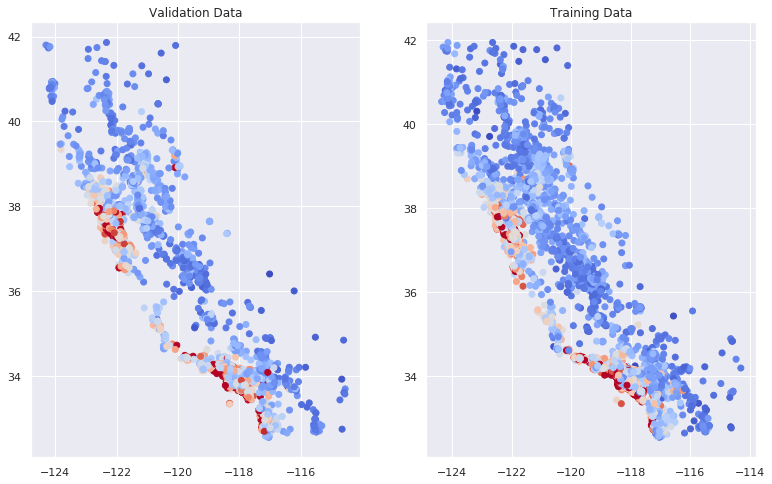

In [9]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")
plt.scatter(X_val["longitude"], X_val["latitude"],
            cmap="coolwarm",
            c=y_val["median_house_value"])

ax = plt.subplot(1,2,2)
ax.set_title("Training Data")
plt.scatter(X_train["longitude"],
            X_train["latitude"],
            cmap="coolwarm",
            c=y_train["median_house_value"])
_ = plt.plot()

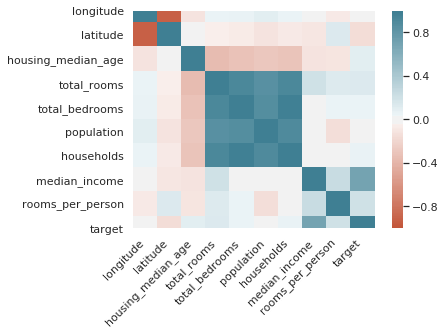

In [10]:
correlation_dataframe = X_train.copy()
correlation_dataframe["target"] = y_train["median_house_value"]

corr = correlation_dataframe.corr()
ax = sns.heatmap( corr, 
                  vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(20, 220, n=200),
                  square=True )
ax.set_xticklabels( ax.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right' );

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True,count=None):
  ds = tf.data.Dataset.from_tensor_slices((dict(features),targets))
  ds = ds.batch(batch_size).repeat(count)
  if shuffle:
    ds = ds.shuffle(10000)
  return ds

In [0]:
def construct_feature_columns(input_features):
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

In [0]:
def train_nn_regression_model( my_optimizer, steps, batch_size, hidden_units, training_examples, training_targets, validation_examples, validation_targets):

  #my_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipnorm =5.0)
  dnn_regressor = tf.estimator.DNNRegressor( feature_columns=construct_feature_columns(training_examples),
                                             hidden_units=hidden_units,
                                             optimizer=my_optimizer )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, training_targets["median_house_value"], batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, training_targets["median_house_value"], count=1, shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, validation_targets["median_house_value"], count=1, shuffle=False)

  print("Training model...")
  print("RMSE (on training data):")
  dnn_regressor.train( input_fn=training_input_fn,
                       steps=steps )
  
  training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
  training_predictions = np.array([item['predictions'][0] for item in training_predictions])
  
  validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
  validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
  
  # Compute training and validation loss.
  training_root_mean_squared_error = math.sqrt( metrics.mean_squared_error(training_predictions, training_targets))
  validation_root_mean_squared_error = math.sqrt( metrics.mean_squared_error(validation_predictions, validation_targets))
  
  print("Model training finished.")

  print("Final RMSE (on training data):   %0.2f" % training_root_mean_squared_error)
  print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)

  return dnn_regressor

In [14]:
dnn_regressor = train_nn_regression_model(  my_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm =5.0),
                                            steps=500,
                                            batch_size=10,
                                            hidden_units=[10, 2],
                                            training_examples=X_train,
                                            training_targets=y_train,
                                            validation_examples=X_val,
                                            validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi5aqm3eb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f60187ef128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
Instructions 

In [15]:
predict_testing_input_fn = lambda: my_input_fn(X_test, 
                                               y_test["median_house_value"], 
                                               count=1, 
                                               shuffle=False)

test_predictions = dnn_regressor.predict(input_fn=predict_testing_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt( metrics.mean_squared_error(test_predictions, y_test))

print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi5aqm3eb/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Final RMSE (on test data): 198.35


In [18]:
dnn_regressor = train_nn_regression_model(my_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, clipnorm =5.0),
                                          steps=2000,
                                          batch_size=100,
                                          hidden_units=[10, 10],
                                          training_examples=X_train,
                                          training_targets=y_train,
                                          validation_examples=X_val,
                                          validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqzssb_pa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6011e846d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
INFO:tensorfl

In [19]:
predict_testing_input_fn = lambda: my_input_fn(X_test, 
                                               y_test["median_house_value"], 
                                               count=1, 
                                               shuffle=False)

test_predictions = dnn_regressor.predict(input_fn=predict_testing_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt( metrics.mean_squared_error(test_predictions, y_test))

print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqzssb_pa/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Final RMSE (on test data): 106.42


In [22]:
_ = train_nn_regression_model(my_optimizer=tf.keras.optimizers.SGD(learning_rate=0.0007, clipnorm =5.0),
                              steps=5000,
                              batch_size=70,
                              hidden_units=[10, 10],
                              training_examples=X_train,
                              training_targets=y_train,
                              validation_examples=X_val,
                              validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpu8ezxie_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f60113becc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
INFO:tensorfl

## **Scaling**

In [0]:
def linear_scale(series):
  min_val = series.min()
  max_val = series.max()
  scale = (max_val - min_val) / 2.0
  return series.apply(lambda x:((x - min_val) / scale) - 1.0)

In [0]:
def normalize_linear_scale(examples_dataframe):
  """Returns a version of the input `DataFrame` that has all its features normalized linearly."""
  processed_features = pd.DataFrame()
  processed_features["latitude"] = linear_scale(examples_dataframe["latitude"])
  processed_features["longitude"] = linear_scale(examples_dataframe["longitude"])
  processed_features["housing_median_age"] = linear_scale(examples_dataframe["housing_median_age"])
  processed_features["total_rooms"] = linear_scale(examples_dataframe["total_rooms"])
  processed_features["total_bedrooms"] = linear_scale(examples_dataframe["total_bedrooms"])
  processed_features["population"] = linear_scale(examples_dataframe["population"])
  processed_features["households"] = linear_scale(examples_dataframe["households"])
  processed_features["median_income"] = linear_scale(examples_dataframe["median_income"])
  processed_features["rooms_per_person"] = linear_scale(examples_dataframe["rooms_per_person"])
  return processed_features

In [0]:
normalized_X_train = normalize_linear_scale(X_train)
normalized_X_val = normalize_linear_scale(X_val)

In [30]:
model_2 = train_nn_regression_model(my_optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, clipnorm =5.0),
                              steps=2000,
                              batch_size=50,
                              hidden_units=[10, 10],
                              training_examples=normalized_X_train,
                              training_targets=y_train,
                              validation_examples=normalized_X_val,
                              validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgwov6nrr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6011c92ef0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
INFO:tensorfl

## **Adagrad Optimizer**

In [35]:
model_3= train_nn_regression_model(my_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.5, clipnorm =5.0),
                                    steps=500,
                                    batch_size=100,
                                    hidden_units=[10, 10],
                                    training_examples=normalized_X_train,
                                    training_targets=y_train,
                                    validation_examples=normalized_X_val,
                                    validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfrqfegns', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6011640dd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
INFO:tensorfl

In [36]:
model_4 = train_nn_regression_model(my_optimizer = tf.keras.optimizers.Adam(learning_rate=0.5, clipnorm =5.0),
                                    steps=500,
                                    batch_size=100,
                                    hidden_units=[10, 10],
                                    training_examples=normalized_X_train,
                                    training_targets=y_train,
                                    validation_examples=normalized_X_val,
                                    validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgixzbqcm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6015cc2978>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
INFO:tensorfl

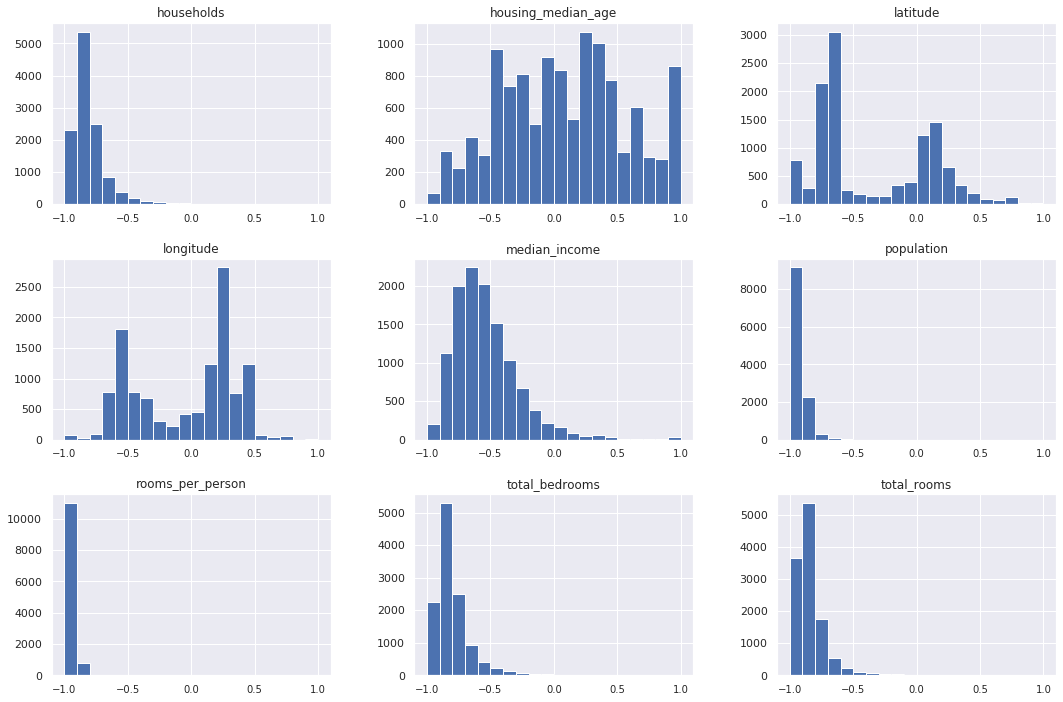

In [38]:
_ = normalized_X_train.hist(bins=20, figsize=(18, 12), xlabelsize=10)

## **Normalizing Features**

In [0]:
def log_normalize(series):
  return series.apply(lambda x:math.log(x+1.0))

def clip(series, clip_to_min, clip_to_max):
  return series.apply(lambda x:( min(max(x, clip_to_min), clip_to_max)))

def z_score_normalize(series):
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

def binary_threshold(series, threshold):
  return series.apply(lambda x:(1 if x > threshold else 0))

In [0]:
def normalize(examples_dataframe):
  """Returns a version of the input `DataFrame` that has all its features normalized."""
  processed_features = pd.DataFrame()

  processed_features["households"] = log_normalize(examples_dataframe["households"])
  processed_features["median_income"] = log_normalize(examples_dataframe["median_income"])
  processed_features["total_bedrooms"] = log_normalize(examples_dataframe["total_bedrooms"])
  
  processed_features["latitude"] = linear_scale(examples_dataframe["latitude"])
  processed_features["longitude"] = linear_scale(examples_dataframe["longitude"])
  processed_features["housing_median_age"] = linear_scale(examples_dataframe["housing_median_age"])

  processed_features["population"] = linear_scale(clip(examples_dataframe["population"], 0, 5000))
  processed_features["rooms_per_person"] = linear_scale(clip(examples_dataframe["rooms_per_person"], 0, 5))
  processed_features["total_rooms"] = linear_scale(clip(examples_dataframe["total_rooms"], 0, 10000))

  return processed_features

In [0]:
normalized_X_train = normalize(X_train)
normalized_X_val = normalize(X_val)

In [43]:
model_5 = train_nn_regression_model(
                                    tf.keras.optimizers.Adam(learning_rate=0.15, clipnorm =5.0),
                                    steps=1000,
                                    batch_size=50,
                                    hidden_units=[10, 10],
                                    training_examples=normalized_X_train,
                                    training_targets=y_train,
                                    validation_examples=normalized_X_val,
                                    validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpblky34bj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f601114a5f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
INFO:tensorfl